<a href="https://colab.research.google.com/github/ILayZ/AIU/blob/master/Pulsars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


%matplotlib inline

from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
path = '/gdrive/My Drive/Colab Notebooks/data/'
%ls "$path"

Credit.csv                    preds.csv         trues.csv
predicting-a-pulsar-star.zip  pulsar_stars.csv


In [4]:
data = pd.read_csv(path+'pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [0]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


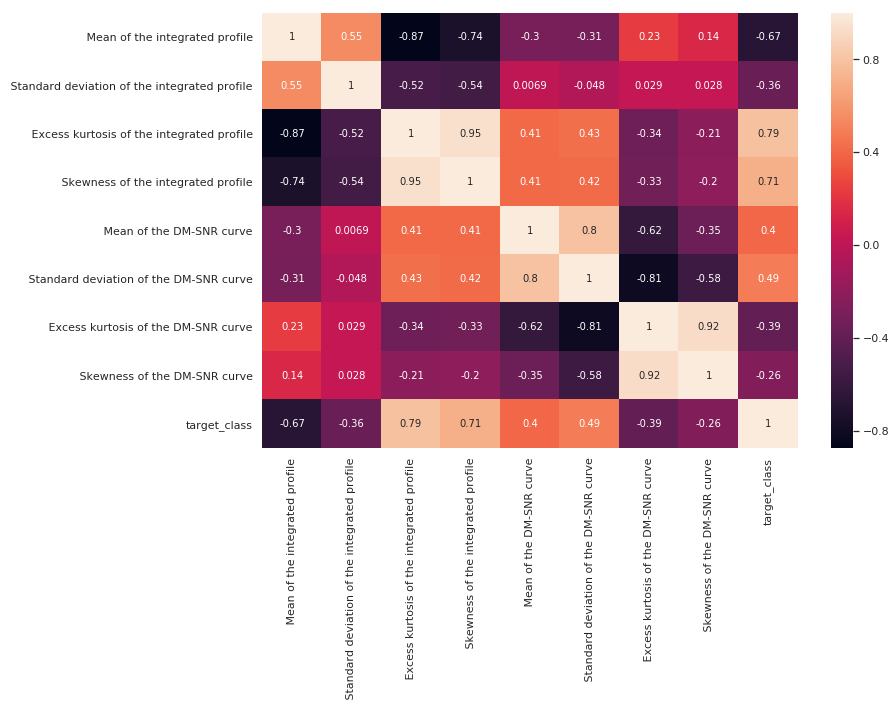

In [0]:
#data.corr()
plt.figure( figsize=(12,8))
sns.heatmap( data.corr(), annot=True )
plt.show()

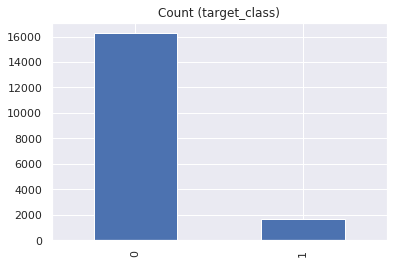

In [0]:
data['target_class'].value_counts().plot(kind = 'bar', title = 'Count (target_class)')
plt.show()

In [0]:
X = np.array(data.iloc[:, 0:-1])
Y = np.array(data.iloc[:, -1])

# Let's split our dataset into a training / testing set and normalize inputs

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score

sss = StratifiedShuffleSplit(n_splits = 2, random_state = 0, test_size = 0.2)

for train_index, test_index in sss.split(X, Y):
    X_train, X_holdout = X[train_index], X[test_index]
    Y_train, Y_holdout = Y[train_index], Y[test_index]

from sklearn.preprocessing import StandardScaler

std_sclr = StandardScaler()
X_train   = std_sclr.fit_transform(X_train)
X_holdout = std_sclr.fit_transform(X_holdout)

print(X_train.shape)
print(Y_train.shape)
print(X_holdout.shape)
print(Y_holdout.shape)

(14318, 8)
(14318,)
(3580, 8)
(3580,)


# Cross-Validation training with best coeff search

In [0]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
res_C = []
for c in range(1, 100):
  res = []
  c = c / 10
  for train_index, test_index in skf.split(X_train, Y_train):
      x_train, x_test = X[train_index], X[test_index]
      y_train, y_test = Y[train_index], Y[test_index]
      lr = LogisticRegression(C=c, solver='liblinear')
      lr.fit(x_train, y_train)
      lr_prediction = lr.predict(x_test)
      res.append( f1_score(y_test,lr_prediction) )
      #lr_prediction_proba = lr.predict_proba(x_test)
  res_C.append( ( c , np.mean(res) ) )

print(res_C)

[(0.1, 0.8774624532240687), (0.2, 0.8830321163585388), (0.3, 0.8866876627129516), (0.4, 0.8882433718715349), (0.5, 0.8882433718715349), (0.6, 0.889823750973741), (0.7, 0.890260254560124), (0.8, 0.8899790567883924), (0.9, 0.8899437608425412), (1.0, 0.8899437608425412), (1.1, 0.8902622904804425), (1.2, 0.890586847526311), (1.3, 0.8910510652208069), (1.4, 0.8910510652208069), (1.5, 0.8914536390535078), (1.6, 0.8910347944957057), (1.7, 0.8913544398241076), (1.8, 0.8915313216172823), (1.9, 0.8911342827808015), (2.0, 0.8916426007105611), (2.1, 0.8912103921405192), (2.2, 0.8912117110902276), (2.3, 0.8908390033571137), (2.4, 0.8916115073723769), (2.5, 0.8915818428492379), (2.6, 0.8916632063271832), (2.7, 0.8912917556184643), (2.8, 0.8919470052078747), (2.9, 0.8916429606863648), (3.0, 0.8916632063271832), (3.1, 0.8923625087224265), (3.2, 0.89193243684914), (3.3, 0.8920628708710415), (3.4, 0.8916914201623227), (3.5, 0.892042756968514), (3.6, 0.8901604912435912), (3.7, 0.8919392797573569), (3.8, 

In [0]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix

best_C = max(res_C, key=lambda x: x[1])
print( best_C )
# обучим модель на всех train данных с этим значением параметра
lr = LogisticRegression(C=best_C[0], solver='liblinear')
lr.fit(X_train, Y_train)
#потом посчитать метрику на отложенном контроле
lr_prediction = lr.predict(X_holdout)
lr_prediction_proba = lr.predict_proba(X_holdout)

cm_lr=confusion_matrix(Y_holdout, lr_prediction)
cm_lr=pd.DataFrame(cm_lr)
cr_lr=classification_report(Y_holdout,lr_prediction)

print('Classification report for Logistic Regression: \n',cr_lr)

(4.9, 0.8938330969577206)
Classification report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4878
           1       0.93      0.83      0.88       492

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



In [0]:
print(lr_prediction_proba)

[[0.91160182 0.08839818]
 [0.97029195 0.02970805]
 [0.96730171 0.03269829]
 ...
 [0.94022066 0.05977934]
 [0.9966053  0.0033947 ]
 [0.9932593  0.0067407 ]]


#Logistic Regression with Cross-Validation

In [9]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix,classification_report

#lr = LogisticRegression(solver='liblinear')
lr = LogisticRegressionCV(cv=10,
                          solver='liblinear'
                          #multi_class='ovr',
                          #random_state=None
                         )
lr.fit(X_train, Y_train)
lr_prediction = lr.predict(X_holdout)
lr_prediction_proba = lr.predict_proba(X_holdout)

cm_lr=confusion_matrix(Y_holdout, lr_prediction)
cm_lr=pd.DataFrame(cm_lr)
cr_lr=classification_report(Y_holdout, lr_prediction)

print('Classification report for Logistic Regression: \n',cr_lr)
print('Confusion matrix for Logistic Regression: \n ', cm_lr)

Classification report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3252
           1       0.94      0.78      0.85       328

    accuracy                           0.98      3580
   macro avg       0.96      0.89      0.92      3580
weighted avg       0.97      0.98      0.97      3580

Confusion matrix for Logistic Regression: 
        0    1
0  3236   16
1    72  256


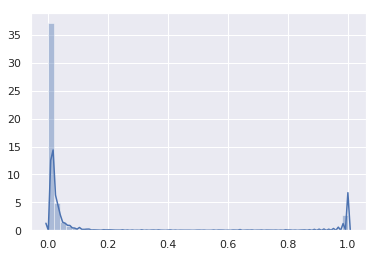

In [0]:
sns.distplot(lr_prediction_proba[:,1])

In [15]:
lr.coef_

array([[ 0.70833403, -0.24917397,  6.60062247, -3.46940909, -0.82919573,
         1.09190581,  0.39003138, -0.66218402]])

In [0]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_holdout, lr_prediction_proba[:,1])

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.91


NameError: ignored

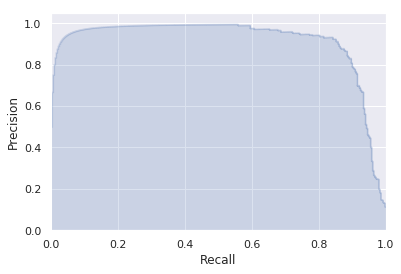

In [16]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(Y_holdout, lr_prediction_proba[:,1])

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

![Confusion Matrix](http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)

In [1]:
#plt.figure( figsize=(12,8))
g = sns.heatmap(cm_lr,annot=True,fmt=".1f")
g.set_ylabel('y_true')
g.set_xlabel('y_pred')
g.set_title("Logistic Regression")
plt.show()

NameError: ignored

In [19]:
import datetime
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
#penalty : str, ‘l1’, ‘l2’, or ‘elasticnet’, optional (default=’l2’)
#‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
#‘liblinear’ and ‘saga’ also handle L1 penalty
#‘saga’ also supports ‘elasticnet’ penalty
#‘liblinear’ does not handle no penalty
grid = [
  #{'C': np.logspace(-3,3,1000), "solver": ["newton-cg", "lbfgs"], "penalty":["l2"]},
  #{'C': np.logspace(-3,3,100), "solver": ["sag"], "penalty":["l2"], "max_iter": [4000]},
  #{'C': np.logspace(-3,3,1000), "solver": ["saga"], "penalty":["elasticnet"], "l1_ratio":np.linspace(0, 1, num=10)},
  {'C': np.logspace(-3,3,1000), "solver": ["liblinear"], "penalty":["l1","l2"]} #"solver": ["liblinear", "saga"],
] # l1 lasso l2 ridge
lr = LogisticRegression();
clf = GridSearchCV(lr, grid, scoring = ['precision'], refit = 'precision', cv=10)
# Fit grid search
print('GridSearchCV start')
start_time  = datetime.datetime.now()

best_model = clf.fit(X_train, Y_train)

end_time = datetime.datetime.now()
print('GridSearchCV end, Time Cost: %d' % ((end_time - start_time).seconds) )

# View best hyperparameters
print('Best C:', best_model.best_estimator_.get_params()['C'])
#print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best l1_ratio:', best_model.best_estimator_.get_params()['l1_ratio'])
#Predict Using Best Model
lr_prediction=best_model.predict(X_holdout)
cm_lr=confusion_matrix(Y_holdout, lr_prediction)
print(cm_lr)

#tuned hyperparameters :(best parameters)  {'C': 4.328761281083062, 'penalty': 'l2', 'solver': 'liblinear'}

#print(clf.cv_results_)
print(clf.best_score_)
# View the best parameters for the model found using grid search
print("Best parameters: ", clf.best_params_)

# Calculate Precision and Recall
tn, fp, fn, tp = cm_lr.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
#GridSearchCV scoring = recall
#[[3236   16]
# [  70  258]]
#0.8344902970131823
#Best parameters:  {'C': 7.275483529196225, 'penalty': 'l2', 'solver': 'liblinear'}
#Recall of the model is 0.79
#Precision of the model is 0.94

GridSearchCV start
GridSearchCV end, Time Cost: 1764
Best C: 0.0010568759711848039
Best Penalty: l1
Best l1_ratio: None
[[3251    1]
 [ 146  182]]
0.9906396166577998
Best parameters:  {'C': 0.0010568759711848039, 'penalty': 'l1', 'solver': 'liblinear'}
Recall of the model is 0.55
Precision of the model is 0.99


In [26]:
import datetime
import pprint
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

print('Select Model...')
start_time  = datetime.datetime.now()
xgb_clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
parameters = {'n_estimators': np.linspace(1, 100, 11).astype(np.int64), 'max_depth':np.linspace(1, 10, 10).astype(np.int64)}
grid_search = GridSearchCV(estimator=xgb_clf, scoring = 'f1', param_grid=parameters, cv=10, n_jobs=-1)
print("parameters:")
pprint.pprint(parameters)
grid_search.fit(X_train, Y_train)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
end_time = datetime.datetime.now()
print('Select Done..., Time Cost: %d' % ((end_time - start_time).seconds) )
#{'max_depth': [3, 5, 7, 9], 'n_estimators': [120, 100, 140]}
#Best score: 0.893
#Best parameters set:	max_depth: 5	n_estimators: 100

Select Model...
parameters:
{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'n_estimators': array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])}
Best score: 0.937
Best parameters set:
	max_depth: 2
	n_estimators: 1
Select Done..., Time Cost: 654


In [27]:
from sklearn.metrics import confusion_matrix,classification_report

xgb_pred = grid_search.predict(X_holdout)
cm_xgb = confusion_matrix(Y_holdout, xgb_pred)
print(cm_xgb)
#[[4844   34]
# [  70  422]]
#[[3235   17]
# [  75  253]]

# Calculate Precision and Recall
tn, fp, fn, tp = cm_xgb.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

[[3235   17]
 [  75  253]]
Recall of the model is 0.77
Precision of the model is 0.94


In [25]:
np.linspace(1, 100, 11).astype(np.int64)

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

#Build model with Keras

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam',          # this update the weights of our model
              loss='binary_crossentropy',# this mesures how accurate our model during training
                  #'sparse_categorical_crossentropy',
              metrics=['mae', 'acc'])    # this used for monitoring the training and testing steps
model.summary()

W0823 13:58:50.580233 140304670128000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0823 13:58:50.725167 140304670128000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [0]:
#callbacks = [keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, restore_best_weights = True)]
history = model.fit(x_train, y_train, epochs=100) #, callbacks=callbacks

Epoch 1/100
10023/10023 [==============================] - 1s 79us/sample - loss: 0.3055 - mean_absolute_error: 0.0609 - acc: 0.9535
Epoch 2/100
10023/10023 [==============================] - 0s 42us/sample - loss: 0.1276 - mean_absolute_error: 0.0489 - acc: 0.9683
Epoch 3/100
10023/10023 [==============================] - 0s 43us/sample - loss: 0.1162 - mean_absolute_error: 0.0474 - acc: 0.9694
Epoch 4/100
10023/10023 [==============================] - 0s 41us/sample - loss: 0.1218 - mean_absolute_error: 0.0484 - acc: 0.9695
Epoch 5/100
10023/10023 [==============================] - 0s 42us/sample - loss: 0.1161 - mean_absolute_error: 0.0473 - acc: 0.9690
Epoch 6/100
10023/10023 [==============================] - 0s 47us/sample - loss: 0.1123 - mean_absolute_error: 0.0475 - acc: 0.9694
Epoch 7/100
10023/10023 [==============================] - 0s 42us/sample - loss: 0.1111 - mean_absolute_error: 0.0472 - acc: 0.9685
Epoch 8/100
10023/10023 [==============================] - 0s 44us/sa

In [0]:
y_pred = model.predict(x_test)
#from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

acc = keras.metrics.binary_accuracy(y_test, y_pred)
#acc      = metrics.accuracy_score  (y_test.argmax(axis = 1), preds.argmax(axis = 1))
#f1       = metrics.f1_score        (y_test.argmax(axis = 1), preds.argmax(axis = 1))
#prec     = metrics.precision_score (y_test.argmax(axis = 1), preds.argmax(axis = 1))
#recall   = metrics.recall_score    (y_test.argmax(axis = 1), preds.argmax(axis = 1))
#conf_mat = metrics.confusion_matrix(y_test.argmax(axis = 1), preds.argmax(axis = 1))

TypeError: ignored

In [0]:
print('Accuracy score: {}%'.format(acc * 100))
print('F-measure: {}%'.format(f1 * 100))
print('Precision score: {}%'.format(prec * 100))
print('Recall score: {}%'.format(recall * 100))
print('Confusion matrix: ')
print(conf_mat)

In [0]:
preds_df = pd.DataFrame(preds.argmax(axis = 1))
trues_df = pd.DataFrame(Y_test)

preds_df.to_csv(path+'preds.csv', index = False)
trues_df.to_csv(path+'trues.csv', index = False)